# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [188]:
# load json as string
json.load((open('world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [189]:
# load as Pandas dataframe
sample_json_df = pd.read_json('world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [190]:
# inspecting the json data for country and project information
df = pd.read_json('world_bank_projects.json')
print(df.columns)
df.head()

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')


,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [191]:
# filter relevant columns for aggregating over country
columns = ['countryshortname', 'project_name', 'mjtheme_namecode', 'status', 'totalcommamt']
country_projects = df.loc[:, columns]
print(country_projects.shape)
print(country_projects.info())
country_projects.head()

(500, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
countryshortname    500 non-null object
project_name        500 non-null object
mjtheme_namecode    500 non-null object
status              500 non-null object
totalcommamt        500 non-null int64
dtypes: int64(1), object(4)
memory usage: 19.6+ KB
None


,countryshortname,project_name,mjtheme_namecode,status,totalcommamt
0,Ethiopia,Ethiopia General Education Quality Improvement...,"[{'code': '8', 'name': 'Human development'}, {...",Active,130000000
1,Tunisia,TN: DTF Social Protection Reforms Support,"[{'code': '1', 'name': 'Economic management'},...",Active,4700000
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...,"[{'code': '5', 'name': 'Trade and integration'...",Active,6060000
3,"Yemen, Republic of",Gov't and Civil Society Organization Partnership,"[{'code': '7', 'name': 'Social dev/gender/incl...",Active,1500000
4,Lesotho,Second Private Sector Competitiveness and Econ...,"[{'code': '5', 'name': 'Trade and integration'...",Active,13100000


In [192]:
# Count the unique instances of country name in the DataFrame
top_10_proj_freq = country_projects['countryshortname'].value_counts(dropna=False)[:10]
top_10_proj_freq

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Nepal                 12
Bangladesh            12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64

# Question 1:
## Visualize the top 10 project funding recipients from the world bank
The following bar graph represents the 10 countries with the most projects funded through the world bank.

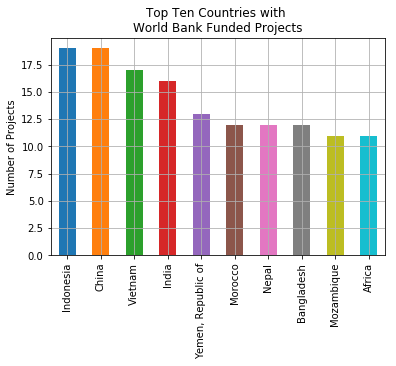

In [193]:
import matplotlib.pyplot as plt
top_10_proj_freq.plot(kind='bar', grid=True, title='Top Ten Countries with \nWorld Bank Funded Projects')
plt.ylabel('Number of Projects')
plt.show()

In [248]:
theme_code = country_projects['mjtheme_namecode']

In [249]:
theme_code_reference = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
theme_name_reference = ['Economic management', 'Public sector governance', 'Rule of law', 'Financial and private sector development', 'Trade and integration', 'Social protection and risk management', 'Social dev/gender/inclusion', 'Human development', 'Urban development', 'Rural development', 'Environment and natural resources management']

In [250]:
reference_df = pd.DataFrame()
reference_df['code_ref'] = theme_code_reference
reference_df['name_ref'] = theme_name_reference
reference_df

,code_ref,name_ref
0,1,Economic management
1,2,Public sector governance
2,3,Rule of law
3,4,Financial and private sector development
4,5,Trade and integration
5,6,Social protection and risk management
6,7,Social dev/gender/inclusion
7,8,Human development
8,9,Urban development
9,10,Rural development


In [251]:
theme_count = {}
code_list = []
the_list = []

for theme_list in theme_code:
    for theme_dict in theme_list:
        code = theme_dict['code']
        theme = theme_dict['name']
        
        code_list.append(int(code))
        the_list.append(theme)
        
        if code in theme_count.keys():
            theme_count[code] += 1
        else:
            theme_count[code] = 1
            
print(theme_count)
print(code_list[:10])
print(the_list[:10])

{'8': 210, '11': 250, '1': 38, '6': 168, '5': 77, '2': 199, '7': 130, '4': 146, '10': 216, '9': 50, '3': 15}
[8, 11, 1, 6, 5, 2, 11, 6, 7, 7]
['Human development', '', 'Economic management', 'Social protection and risk management', 'Trade and integration', 'Public sector governance', 'Environment and natural resources management', 'Social protection and risk management', 'Social dev/gender/inclusion', 'Social dev/gender/inclusion']


In [252]:
theme_codes_list = []
theme_count_list = []

for (key, value) in theme_count.items():
    theme_codes_list.append(int(key))
    theme_count_list.append(value)
    
print(theme_codes_list)
print(theme_count_list)

[8, 11, 1, 6, 5, 2, 7, 4, 10, 9, 3]
[210, 250, 38, 168, 77, 199, 130, 146, 216, 50, 15]


In [253]:
code_freq = pd.DataFrame(columns=['theme_code', 'theme_count'])
code_freq.theme_code = theme_codes_list
code_freq.theme_count = theme_count_list

df_sorted = code_freq.sort_values(by=['theme_count'], ascending=False)

print(df_sorted.head(10))

   theme_code  theme_count
1          11          250
8          10          216
0           8          210
5           2          199
3           6          168
7           4          146
6           7          130
4           5           77
9           9           50
2           1           38


In [254]:
forward_fill_df = pd.DataFrame()
forward_fill_df['Theme Code'] = code_list
forward_fill_df['Theme Name'] = the_list

forward_fill_df_sorted = forward_fill_df.sort_values(by=['Theme Code'])
forward_fill_df_sorted = forward_fill_df_sorted.reset_index()

theme_df_clean = forward_fill_df_sorted.loc[:, ['Theme Code', 'Theme Name']]
print(theme_df_clean.head(10))
print(theme_df_clean.tail(10))
print(theme_df_clean.info())

   Theme Code           Theme Name
0           1                     
1           1  Economic management
2           1  Economic management
3           1  Economic management
4           1                     
5           1  Economic management
6           1  Economic management
7           1  Economic management
8           1  Economic management
9           1                     
      Theme Code                                    Theme Name
1489          11  Environment and natural resources management
1490          11  Environment and natural resources management
1491          11  Environment and natural resources management
1492          11  Environment and natural resources management
1493          11  Environment and natural resources management
1494          11  Environment and natural resources management
1495          11  Environment and natural resources management
1496          11  Environment and natural resources management
1497          11  Environment and natural resour

In [255]:
print(theme_df_clean['Theme Name'].value_counts())
print(theme_df_clean['Theme Code'].value_counts())

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: Theme Name, dtype: int64
11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
3      15
Name: Theme Code, dtype: int64


In [256]:
df_merged = theme_df_clean.merge(reference_df, how='left', left_on='Theme Code', right_on='code_ref')
print(df_merged.head(10))
print(df_merged.tail(10))

   Theme Code           Theme Name  code_ref             name_ref
0           1                              1  Economic management
1           1  Economic management         1  Economic management
2           1  Economic management         1  Economic management
3           1  Economic management         1  Economic management
4           1                              1  Economic management
5           1  Economic management         1  Economic management
6           1  Economic management         1  Economic management
7           1  Economic management         1  Economic management
8           1  Economic management         1  Economic management
9           1                              1  Economic management
      Theme Code                                    Theme Name  code_ref  \
1489          11  Environment and natural resources management        11   
1490          11  Environment and natural resources management        11   
1491          11  Environment and natural reso

In [257]:
df_final = df_merged.loc[:, ['code_ref', 'name_ref']]
print(df_final.head())

   code_ref             name_ref
0         1  Economic management
1         1  Economic management
2         1  Economic management
3         1  Economic management
4         1  Economic management
